In [21]:
# Importamos Suport Vector Machine
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
# Para el "último consejo"
from sklearn.preprocessing import StandardScaler


In [22]:
# x contiene los pesos y altura de los perros
x = np.array([
    [1.8, 2.5],
    [2.7, 2.1],
    [3.1, 3.2],
    [2.3, 2.6],
    [3.8, 2.9],
    [2.1, 3.0],
    [7.1, 8.2],
    [6.5, 7.4],
    [7.8, 7.1],
    [7.9, 8.3],
    [8.4, 8.8],
    [9.1, 7.2]
])

# y contiene las respuestas o clases
# 0 son los perros bajos y delgados
# 1 son los perros altos y pesados
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

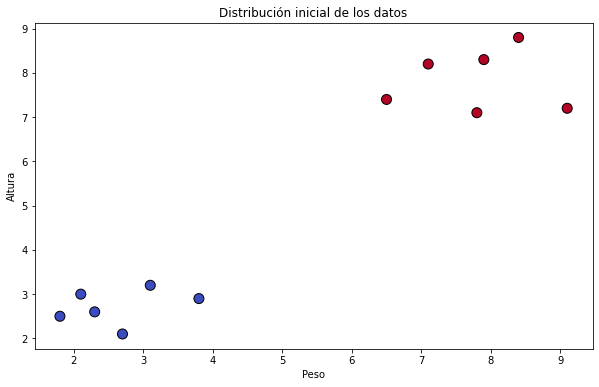

In [23]:
# Graficar la distribución inicial de los datos
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.title('Distribución inicial de los datos')
plt.show()

In [17]:
# Definimos el algoritmo con sus parametros
# C es el hiperparametro para controlar el margen
# si C es alto es un margen duro, si es bajo es blando
# loss corresponde a la función de coste
lin_svc = LinearSVC(C=1, loss='hinge')

In [18]:
# Se entrena el modelo
lin_svc.fit(x, y)

c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

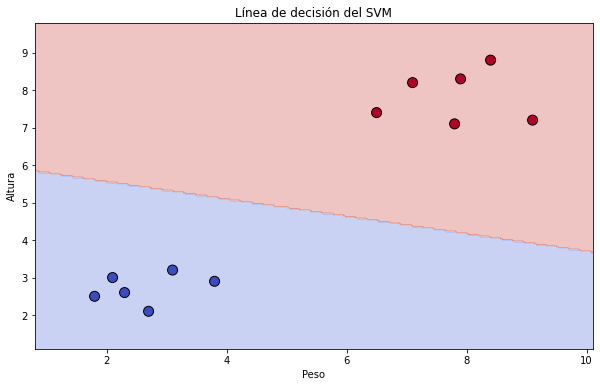

In [24]:
# Función para graficar la línea de decisión del SVM
def plot_decision_boundary(x, y, model):
    # Crear un grid para el gráfico
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Predecir en el grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Peso')
    plt.ylabel('Altura')
    plt.title('Línea de decisión del SVM')
    plt.show()

# Llamar a la función para graficar la línea de decisión
plot_decision_boundary(x, y, lin_svc)

In [28]:
# Predicción
new_point = np.array([[2.1, 3.2]])
predicted_class = lin_svc.predict(new_point)

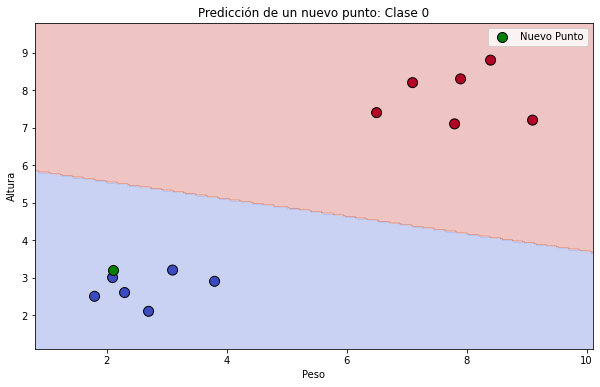

In [30]:
# Graficar la distribución con el nuevo punto y la línea de decisión
def plot_with_new_point(x, y, model, new_point, predicted_class):
    # Crear un grid para el gráfico
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Predecir en el grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.scatter(new_point[:, 0], new_point[:, 1], c='green', edgecolors='black', s=100, label='Nuevo Punto')
    plt.xlabel('Peso')
    plt.ylabel('Altura')
    plt.title(f'Predicción de un nuevo punto: Clase {predicted_class[0]}')
    plt.legend()
    plt.show()

# Llamar a la función para graficar con el nuevo punto
plot_with_new_point(x, y, lin_svc, new_point, predicted_class)

In [20]:
# Codigo "Ultimo consejo"
# Si el dataset donde los ejes tienen escalas totalmente diferentes
# Debes escalar los datos para tener un modelo funcional
print(x)
scaler = StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)
print(x_scaler)

[[1.8 2.5]
 [2.7 2.1]
 [3.1 3.2]
 [2.3 2.6]
 [3.8 2.9]
 [2.1 3. ]
 [7.1 8.2]
 [6.5 7.4]
 [7.8 7.1]
 [7.9 8.3]
 [8.4 8.8]
 [9.1 7.2]]
[[-1.26894245 -1.06323595]
 [-0.93468444 -1.21649519]
 [-0.78612532 -0.79503229]
 [-1.08324356 -1.02492114]
 [-0.52614687 -0.90997671]
 [-1.15752312 -0.8716619 ]
 [ 0.69946584  1.12070816]
 [ 0.47662717  0.81418969]
 [ 0.95944429  0.69924526]
 [ 0.99658407  1.15902297]
 [ 1.18228297  1.35059702]
 [ 1.44226142  0.73756007]]
